In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np


Model: "od_esolver_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                60        
                                                                 
 dense_9 (Dense)             (None, 50)                1550      
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 dense_11 (Dense)            (None, 10)                260       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,156
Trainable params: 3,156
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 

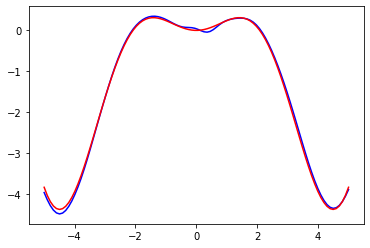

In [4]:
class ODEsolver(Sequential):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.loss_tracker = keras.metrics.Mean(name = 'my_loss')

  @property
  def metrics(self):
    return [self.loss_tracker]

  def train_step(self, data):
    batch_size = tf.shape(data)[0]
    x = tf.random.uniform((batch_size, 1), minval = -5, maxval = 5)

    with tf.GradientTape() as tape:
      with tf.GradientTape() as tape2:
        tape2.watch(x)
        y_pred = self(x, training = True)
      dy = tape2.gradient(y_pred, x)
      x_o = tf.zeros((batch_size, 1))
      y_o = self(x_o, training = True)
      eq = x*dy + y_pred - x**2 * tf.math.cos(x)
      ic = y_o 
      loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic)

    grads = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

    self.loss_tracker.update_state(loss)

    return {'my_loss': self.loss_tracker.result()}

model = ODEsolver()

model.add(Dense(30, activation='tanh', input_shape=(1,)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(10, activation='linear'))
model.add(Dense(1))

model.summary()

model.compile(optimizer=RMSprop(),metrics=['loss'])
x=tf.linspace(-5,5,100)
history = model.fit(x,epochs=1000, verbose=1)

x_testv = tf.linspace(-5,5,100)
a=model.predict(x_testv)
plt.plot(x_testv,a, color='b', label='Solución real')
plt.plot(x_testv,(((x*x -2)*np.sin(x))/x) + 2*np.cos(x), color='r', label='Solución real')
plt.show()

  

In [ ]:
class ODEsolver(Sequential):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.loss_tracker = keras.metrics.Mean(name = 'my_loss')

  @property
  def metrics(self):
    return [self.loss_tracker]

  def train_step(self, data):
    batch_size = tf.shape(data)[0]
    x = tf.random.uniform((batch_size, 1), minval = -5, maxval = 5)

    with tf.GradientTape() as tape:
      with tf.GradientTape() as tape2:
        tape2.watch(x)
        y_pred = self(x, training = True)
      dy = tape2.gradient(y_pred, x)
      x_o = tf.zeros((batch_size, 1))
      y_o = self(x_o, training = True)
      eq = x*dy + y_pred - x**2 * tf.math.cos(x)
      ic = y_o 
      loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic)

    grads = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

    self.loss_tracker.update_state(loss)

    return {'my_loss': self.loss_tracker.result()}

model = ODEsolver()

model.add(Dense(30, activation='tanh', input_shape=(1,)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(10, activation='linear'))
model.add(Dense(1))

model.summary()

model.compile(optimizer=RMSprop(),metrics=['loss'])
x=tf.linspace(-5,5,100)
history = model.fit(x,epochs=1000, verbose=1)

x_testv = tf.linspace(-5,5,100)
a=model.predict(x_testv)
plt.plot(x_testv,a, color='b', label='Solución real')
plt.plot(x_testv,(((x*x -2)*np.sin(x))/x) + 2*np.cos(x), color='r', label='Solución real')
plt.show()
